<a href="https://colab.research.google.com/github/19pa1a05c7/clustering-with-kmeans/blob/master/copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# TEAM MEMBERS:


1.   **sadhik**  -19PA1A05C7
2.   **jagadeesh**  -19PA1A05C3
1.   **nagaraju**  -19PA1A0591
2.   **mohana santhi**  -19PA1A05B1




# **Importing the required modules**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# **Forming dataframes of single day and concating them to a single dataframe.**

In [4]:
d1=pd.read_csv("01-22-2020.csv")
d2=pd.read_csv("01-23-2020.csv")
d3=pd.read_csv("01-24-2020.csv")
d4=pd.read_csv("01-25-2020.csv")
d5=pd.read_csv("01-26-2020.csv")
d6=pd.read_csv("01-27-2020.csv")
d7=pd.read_csv("01-28-2020.csv")
d8=pd.read_csv("01-29-2020.csv")
d9=pd.read_csv("01-30-2020.csv")
d10=pd.read_csv("01-31-2020.csv")
d11=pd.read_csv("02-01-2020.csv")
d12=pd.read_csv("02-02-2020.csv")
d13=pd.read_csv("02-03-2020.csv")
d14=pd.read_csv("02-04-2020.csv")
d15=pd.read_csv("02-05-2020.csv")
d16=pd.read_csv("02-06-2020.csv")
d17=pd.read_csv("02-07-2020.csv")
d18=pd.read_csv("02-08-2020.csv")
d19=pd.read_csv("02-09-2020.csv")
d20=pd.read_csv("02-10-2020.csv")
d21=pd.read_csv("02-11-2020.csv")
d22=pd.read_csv("02-12-2020.csv")
d23=pd.read_csv("02-13-2020.csv")
d24=pd.read_csv("02-14-2020.csv")
d25=pd.read_csv("02-15-2020.csv")
d26=pd.read_csv("02-16-2020.csv")
d27=pd.read_csv("02-17-2020.csv")
d28=pd.read_csv("02-18-2020.csv")
d29=pd.read_csv("02-19-2020.csv")
d30=pd.read_csv("02-20-2020.csv")
d31=pd.read_csv("02-21-2020.csv")
d32=pd.read_csv("02-22-2020.csv")
d33=pd.read_csv("02-23-2020.csv")
d34=pd.read_csv("02-24-2020.csv")
d35=pd.read_csv("02-25-2020.csv")
d36=pd.read_csv("02-26-2020.csv")
d37=pd.read_csv("02-27-2020.csv")
d38=pd.read_csv("02-28-2020.csv")
d39=pd.read_csv("02-29-2020.csv")
d40=pd.read_csv("03-01-2020.csv")
d41=pd.read_csv("03-02-2020.csv")
d42=pd.read_csv("03-03-2020.csv")
d43=pd.read_csv("03-04-2020.csv")
d44=pd.read_csv("03-05-2020.csv")
d45=pd.read_csv("03-06-2020.csv")
d46=pd.read_csv("03-07-2020.csv")
d47=pd.read_csv("03-08-2020.csv")
d48=pd.read_csv("03-09-2020.csv")
d49=pd.read_csv("03-10-2020.csv")
d50=pd.read_csv("03-11-2020.csv")
d51=pd.read_csv("03-12-2020.csv")
d52=pd.read_csv("03-13-2020.csv")
d53=pd.read_csv("03-14-2020.csv")
d54=pd.read_csv("03-15-2020.csv")
d55=pd.read_csv("03-16-2020.csv")
d56=pd.read_csv("03-17-2020.csv")
d57=pd.read_csv("03-18-2020.csv")
d58=pd.read_csv("03-19-2020.csv")
d59=pd.read_csv("03-20-2020.csv")
d60=pd.read_csv("03-21-2020.csv")
d61=pd.read_csv("03-22-2020.csv")
d62=pd.read_csv("03-23-2020.csv")
d63=pd.read_csv("03-24-2020.csv")
d64=pd.read_csv("03-25-2020.csv")
d65=pd.read_csv("03-26-2020.csv")

frame=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65]
covid=pd.concat(frame)
covid


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,NaN,NaN,NaN,107.0,0.0,15.0,NaN,NaN,NaN,NaN,NaN,Venezuela,2020-03-26 23:48:18,6.423800,-66.589700,92.0,Venezuela
3417,NaN,NaN,NaN,153.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,Vietnam,2020-03-26 23:48:18,14.058324,108.277199,133.0,Vietnam
3418,NaN,NaN,NaN,84.0,1.0,17.0,NaN,NaN,NaN,NaN,NaN,West Bank and Gaza,2020-03-26 23:48:18,31.952200,35.233200,66.0,West Bank and Gaza
3419,NaN,NaN,NaN,16.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Zambia,2020-03-26 23:48:18,-13.133897,27.849332,16.0,Zambia


In [0]:
covid["Longitude"]=covid["Long_"]
covid["Latitude"]=covid["Lat"]
covid["Province/State"]=covid["Province_State"]
covid["Last Update"]=covid["Last_Update"]
covid["Country/Region"]=covid["Country_Region"]
covid


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,NaN,Venezuela,2020-03-26 23:48:18,107.0,0.0,15.0,6.423800,-66.589700,NaN,NaN,NaN,Venezuela,2020-03-26 23:48:18,6.423800,-66.589700,92.0,Venezuela
3417,NaN,Vietnam,2020-03-26 23:48:18,153.0,0.0,20.0,14.058324,108.277199,NaN,NaN,NaN,Vietnam,2020-03-26 23:48:18,14.058324,108.277199,133.0,Vietnam
3418,NaN,West Bank and Gaza,2020-03-26 23:48:18,84.0,1.0,17.0,31.952200,35.233200,NaN,NaN,NaN,West Bank and Gaza,2020-03-26 23:48:18,31.952200,35.233200,66.0,West Bank and Gaza
3419,NaN,Zambia,2020-03-26 23:48:18,16.0,0.0,0.0,-13.133897,27.849332,NaN,NaN,NaN,Zambia,2020-03-26 23:48:18,-13.133897,27.849332,16.0,Zambia


# **Cleaning the data**

In [0]:
covid["Confirmed"].fillna(covid["Confirmed"].mean(),inplace=True) 
covid["Deaths"].fillna(covid["Deaths"].mean(),inplace=True)
covid["Recovered"].fillna(covid["Recovered"].mean(),inplace=True)
covid["Province/State"].fillna(covid["Province/State"].mode()[0],inplace=True)
covid["Latitude"].fillna(covid["Latitude"].mean(),inplace=True)
covid["Longitude"].fillna(covid["Longitude"].mean(),inplace=True)

In [0]:
covid=covid.drop(["Active","Admin2","Combined_Key","Country_Region","FIPS","Last_Update","Lat","Long_","Province_State"],axis=1)

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24435 entries, 0 to 3420
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  24435 non-null  object 
 1   Country/Region  7345 non-null   object 
 2   Last Update     7345 non-null   object 
 3   Confirmed       24435 non-null  float64
 4   Deaths          24435 non-null  float64
 5   Recovered       24435 non-null  float64
 6   Latitude        24435 non-null  float64
 7   Longitude       24435 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.7+ MB


# **Forming dataframe contributing each row to each city.**

In [8]:
covid19=covid.iloc[:,[6,7,0,3,5,4]]
covid19

,Latitude,Longitude,Province/State,Confirmed,Recovered,Deaths
0,29.282861,6.41448,Anhui,1.000000,93.535368,10.643077
1,29.282861,6.41448,Beijing,14.000000,93.535368,10.643077
2,29.282861,6.41448,Chongqing,6.000000,93.535368,10.643077
3,29.282861,6.41448,Fujian,1.000000,93.535368,10.643077
4,29.282861,6.41448,Gansu,278.897403,93.535368,10.643077
...,...,...,...,...,...,...
3416,29.282861,6.41448,Gansu,107.000000,15.000000,0.000000
3417,29.282861,6.41448,Gansu,153.000000,20.000000,0.000000
3418,29.282861,6.41448,Gansu,84.000000,17.000000,1.000000
3419,29.282861,6.41448,Gansu,16.000000,0.000000,0.000000


In [0]:
covid19=covid19.drop(["Province/State"],axis=1)

In [10]:
covid19.columns

Index(['Latitude', 'Longitude', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [11]:
x=covid19.iloc[:,0:5].values
x

array([[29.28286099,  6.41448026,  1.        , 93.53536824, 10.64307744],
       [29.28286099,  6.41448026, 14.        , 93.53536824, 10.64307744],
       [29.28286099,  6.41448026,  6.        , 93.53536824, 10.64307744],
       ...,
       [29.28286099,  6.41448026, 84.        , 17.        ,  1.        ],
       [29.28286099,  6.41448026, 16.        ,  0.        ,  0.        ],
       [29.28286099,  6.41448026,  3.        ,  0.        ,  1.        ]])

Text(0, 0.5, 'latitude')

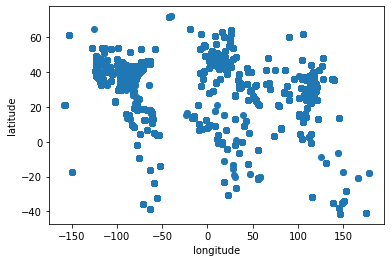

In [13]:
plt.scatter(x[:,1],x[:,0])
plt.xlabel("longitude")
plt.ylabel("latitude")

Text(0, 0.5, 'deaths')

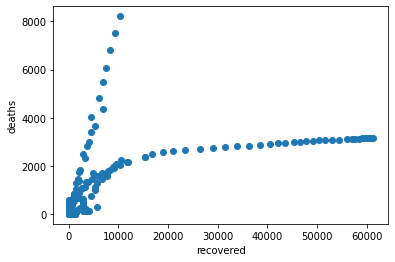

In [14]:
plt.scatter(x[:,3],x[:,4])
plt.xlabel("recovered")
plt.ylabel("deaths")

Text(0, 0.5, 'recovered')

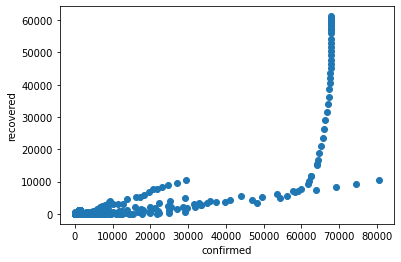

In [16]:
plt.scatter(x[:,2],x[:,3])
plt.xlabel("confirmed")
plt.ylabel("recovered")


Text(0, 0.5, 'deaths')

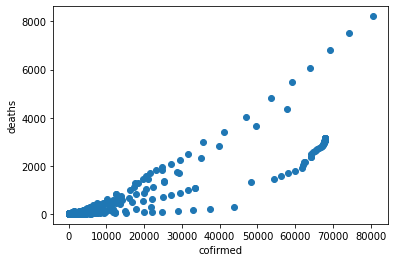

In [18]:
plt.scatter(x[:,2],x[:,4])
plt.xlabel("cofirmed")
plt.ylabel("deaths")


In [19]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (176 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702089 sha256=e37353feb05cd95b3a14fe1e8bd537d39349277c63049429bccf71980d0eb193
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.0
    Uninstalling pyproj-2.6.0:
      Successfully uninstalled pyproj-2.6.0


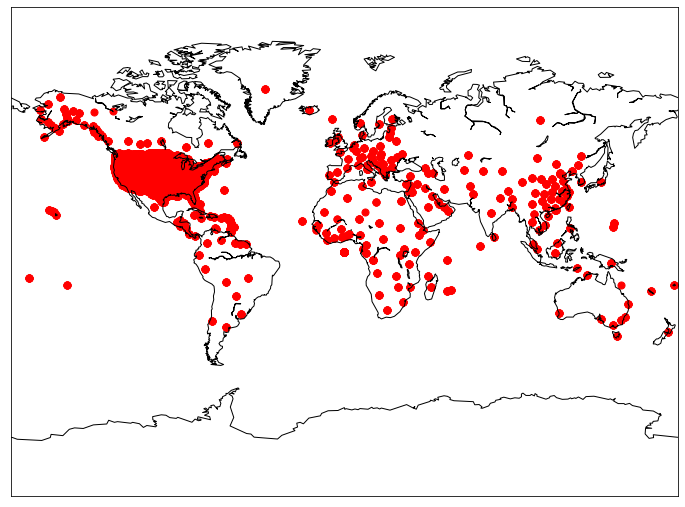

In [0]:
fig=plt.figure(figsize=(12,9))
m=Basemap(projection="mill",llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution="c")
m.drawcoastlines()
m.scatter(x[:,1],x[:,0],latlon=True,s=50,c="red")


# **Finding optimal value of cluster through elbow method.**

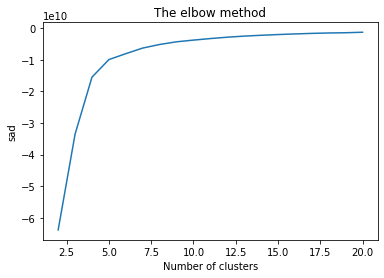

In [0]:
sad = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sad.append(kmeans.score(x))
plt.plot(range(2,21),sad)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sad')
plt.show()


**From the graph we conclude the optimal value of cluster is 5.**

# **Clustering**

In [0]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
cen=kmeans.cluster_centers_
cen

array([[ 3.69554669e+01, -8.34571730e+01,  6.65292392e+01,
         2.10569783e+01,  9.82416377e-01],
       [ 3.81806303e+01, -5.86763014e+01,  6.15861538e+04,
         1.16538077e+04,  3.36388462e+03],
       [ 3.79080957e+01, -4.13530463e+01,  2.73353947e+04,
         3.55421053e+03,  1.27202632e+03],
       [ 3.57702507e+01, -4.41110093e+01,  6.76567600e+04,
         5.01468000e+04,  3.03312000e+03],
       [ 3.99777866e+01, -5.32610223e+01,  9.06375000e+03,
         8.66416667e+02,  2.56395833e+02]])

# Graph 1:confirmed Vs deaths

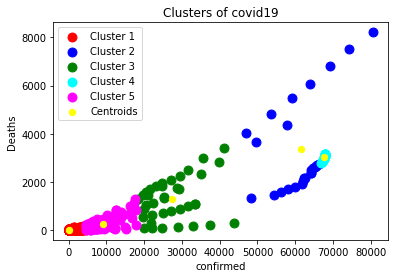

In [0]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 4], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 4], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 4], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 2], x[y_kmeans == 3, 4], s = 80, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 2], x[y_kmeans == 4, 4], s = 80, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 4], s =40, c = 'yellow', label = 'Centroids')
plt.title('Clusters of covid19')
plt.xlabel("confirmed")
plt.ylabel('Deaths')
plt.legend()
plt.show()


# **Graph 2:Confirmed Vs recovered**

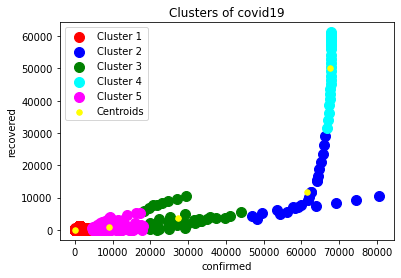

In [0]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 2], x[y_kmeans == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 2], x[y_kmeans == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of covid19')
plt.xlabel('confirmed')
plt.ylabel('recovered')
plt.legend()
plt.show()


# **Graph 3:Recovered Vs Deaths**

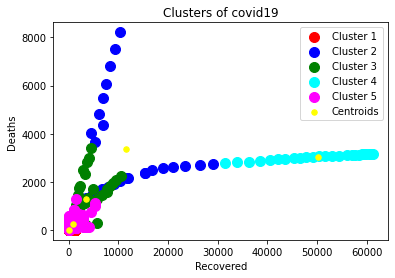

In [0]:
plt.scatter(x[y_kmeans == 0, 3], x[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 3], x[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 3], x[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 3], x[y_kmeans == 3, 4], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 3], x[y_kmeans == 4, 4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 4], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of covid19')
plt.xlabel('Recovered')
plt.ylabel('Deaths')
plt.legend()
plt.show()


# **Plotting clusters on world map**

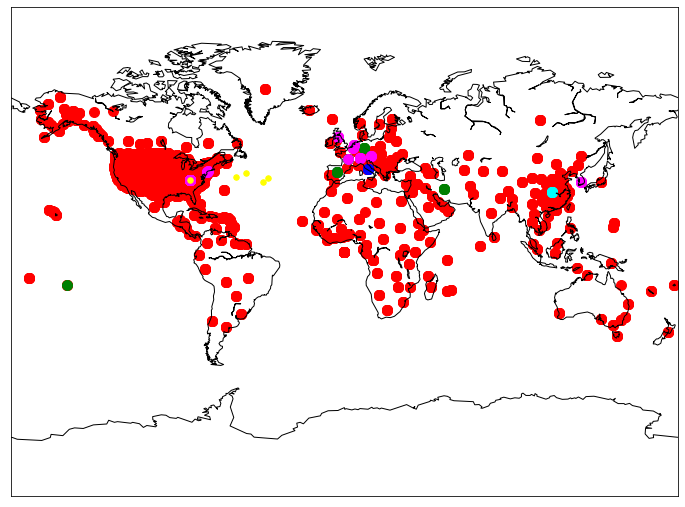

In [0]:
fig=plt.figure(figsize=(12,9))
m.drawcoastlines()

m.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 0],latlon=True,s = 100, c = 'red')
m.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 0],latlon=True, s = 100, c = 'blue')
m.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 0],latlon=True, s = 100, c = 'green')
m.scatter(x[y_kmeans == 3, 1], x[y_kmeans == 3, 0],latlon=True, s = 100, c = 'cyan')
m.scatter(x[y_kmeans == 4, 1], x[y_kmeans == 4, 0], latlon=True,s = 100, c = 'magenta')
m.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0],latlon=True, s = 30, c = 'yellow')
plt.show()


# Observations:


1.   From the graph **Confirmed Vs Deaths** blue colour cluster have higher number of cases and higher number of deaths.Which is **Italy** in the world map.cyan colour cluster have higher number of cases but lower deaths than blue cluster which is china in the world map.
2.   From the graph **Confirmed Vs Recovered** cyan cluster have near or less number of confirmed cases than blue cluster but have high recovered cases than blue cluster.
1.   Whatever the recovery rate is but having low
deaths will be the good sign.In this scenario when we look at the graph of **recovered vs deaths** blue cluster has more number of deaths compare to other clusters,so the countries in blue region are in dangerous situation.From the map it is clear that **Italy** is in dangerous situation.

1.   Green cluster which is in a place after blue cluster better in having low deaths compared to blue cluster.From the map it is clear that **Spain,France and Iran** are next to italy.
1.   From the graph of **recovered vs deaths** we clearly observe cyan cluster have more recovery rate than any other cluster which means the regions having cyan colour are doing their best in containing the disease.From the graph it is evident that **China** is doing good enough.
2.   Red color cluster is a cluster of cases in which both death rate and recovered late is low.which means they are neither good nor bad.The region having maximum red and and also some pink cluster like **USA** said to have more number of cases with some deaths.

